In [149]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import shap

from shap import Explainer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, explained_variance_score, mean_absolute_percentage_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor


df = pd.read_csv("World Happiness Report.csv")
df.head()

,Country Name,Regional Indicator,Year,Life Ladder,Log GDP Per Capita,Social Support,Healthy Life Expectancy At Birth,Freedom To Make Life Choices,Generosity,Perceptions Of Corruption,Positive Affect,Negative Affect,Confidence In National Government
0,Afghanistan,South Asia,2008,3.723590,7.350416,0.450662,50.500000,0.718114,0.167652,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,South Asia,2009,4.401778,7.508646,0.552308,50.799999,0.678896,0.190809,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,South Asia,2010,4.758381,7.613900,0.539075,51.099998,0.600127,0.121316,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,South Asia,2011,3.831719,7.581259,0.521104,51.400002,0.495901,0.163571,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,South Asia,2012,3.782938,7.660506,0.520637,51.700001,0.530935,0.237588,0.775620,0.613513,0.267919,0.435440


In [150]:
df.isnull().sum()

Country Name                           0
Regional Indicator                   112
Year                                   0
Life Ladder                            0
Log GDP Per Capita                    20
Social Support                        13
Healthy Life Expectancy At Birth      54
Freedom To Make Life Choices          33
Generosity                            73
Perceptions Of Corruption            116
Positive Affect                       24
Negative Affect                       16
Confidence In National Government    361
dtype: int64

<h2 align="center">Dealing with NaN values

In [151]:
# fill null values with mean method

imputer = SimpleImputer(missing_values=np.nan, strategy='mean', fill_value=None)
df['Log GDP Per Capita'] = imputer.fit_transform(df[['Log GDP Per Capita']])
df['Social Support'] = imputer.fit_transform(df[['Social Support']])
df['Healthy Life Expectancy At Birth'] = imputer.fit_transform(df[['Healthy Life Expectancy At Birth']])
df['Freedom To Make Life Choices'] = imputer.fit_transform(df[['Freedom To Make Life Choices']])
df['Generosity'] = imputer.fit_transform(df[['Generosity']])
df['Perceptions Of Corruption'] = imputer.fit_transform(df[['Perceptions Of Corruption']])
df['Positive Affect'] = imputer.fit_transform(df[['Positive Affect']])
df['Negative Affect'] = imputer.fit_transform(df[['Negative Affect']])
df['Confidence In National Government'] = imputer.fit_transform(df[['Confidence In National Government']])

df.isnull().sum()

Country Name                           0
Regional Indicator                   112
Year                                   0
Life Ladder                            0
Log GDP Per Capita                     0
Social Support                         0
Healthy Life Expectancy At Birth       0
Freedom To Make Life Choices           0
Generosity                             0
Perceptions Of Corruption              0
Positive Affect                        0
Negative Affect                        0
Confidence In National Government      0
dtype: int64

<h2 align="center">Filling in missing regional indicators

In [152]:
missing_regions = df[df['Regional Indicator'].isnull()].drop_duplicates(subset=['Country Name'])

# Display results
print(missing_regions[['Country Name', 'Regional Indicator']])

                  Country Name Regional Indicator
39                      Angola                NaN
179                     Belize                NaN
195                     Bhutan                NaN
344   Central African Republic                NaN
434           Congo (Kinshasa)                NaN
475                       Cuba                NaN
491                    Czechia                NaN
522                   Djibouti                NaN
610                   Eswatini                NaN
765                     Guyana                NaN
1485                      Oman                NaN
1598                     Qatar                NaN
1752                   Somalia                NaN
1755         Somaliland region                NaN
1792               South Sudan                NaN
1828        State of Palestine                NaN
1843                     Sudan                NaN
1848                  Suriname                NaN
1878                     Syria                NaN


In [153]:
df.loc[df['Country Name'] == 'Angola', 'Regional Indicator'] = 'Sub-Saharan Africa'
df.loc[df['Country Name'] == 'Belize', 'Regional Indicator'] = 'Latin America and Caribbean'
df.loc[df['Country Name'] == 'Bhutan', 'Regional Indicator'] = 'South Asia'
df.loc[df['Country Name'] == 'Central African Republic', 'Regional Indicator'] = 'Sub-Saharan Africa'
df.loc[df['Country Name'] == 'Congo (Kinshasa)', 'Regional Indicator'] = 'Sub-Saharan Africa'
df.loc[df['Country Name'] == 'Cuba', 'Regional Indicator'] = 'Latin America and Caribbean'
df.loc[df['Country Name'] == 'Czechia', 'Regional Indicator'] = 'Central and Eastern Europe'
df.loc[df['Country Name'] == 'Djibouti', 'Regional Indicator'] = 'Middle East and North Africa'
df.loc[df['Country Name'] == 'Eswatini', 'Regional Indicator'] = 'Sub-Saharan Africa'
df.loc[df['Country Name'] == 'Guyana', 'Regional Indicator'] = 'Latin America and Caribbean'
df.loc[df['Country Name'] == 'Oman', 'Regional Indicator'] = 'Middle East and North Africa'
df.loc[df['Country Name'] == 'Qatar', 'Regional Indicator'] = 'Middle East and North Africa'
df.loc[df['Country Name'] == 'Somalia', 'Regional Indicator'] = 'Sub-Saharan Africa'
df.loc[df['Country Name'] == 'Somaliland region', 'Regional Indicator'] = 'Middle East and North Africa'
df.loc[df['Country Name'] == 'South Sudan', 'Regional Indicator'] = 'Sub-Saharan Africa'
df.loc[df['Country Name'] == 'State of Palestine', 'Regional Indicator'] = 'Middle East and North Africa'
df.loc[df['Country Name'] == 'Sudan', 'Regional Indicator'] = 'Sub-Saharan Africa'
df.loc[df['Country Name'] == 'Suriname', 'Regional Indicator'] = 'Latin America and Caribbean'
df.loc[df['Country Name'] == 'Syria', 'Regional Indicator'] = 'Middle East and North Africa'
df.loc[df['Country Name'] == 'Trinidad and Tobago', 'Regional Indicator'] = 'Latin America and Caribbean'
df.loc[df['Country Name'] == 'Turkiye', 'Regional Indicator'] = 'Middle East and North Africa'
df.isnull().sum()






Country Name                         0
Regional Indicator                   0
Year                                 0
Life Ladder                          0
Log GDP Per Capita                   0
Social Support                       0
Healthy Life Expectancy At Birth     0
Freedom To Make Life Choices         0
Generosity                           0
Perceptions Of Corruption            0
Positive Affect                      0
Negative Affect                      0
Confidence In National Government    0
dtype: int64

<h2 align="center">Happiness Index of Countries Visualized

In [154]:
df = df.rename(columns={'Life Ladder': 'Happiness Index'})

# HAPPINESS INDEX
fig=px.line(df, x='Year', y='Happiness Index', animation_frame='Country Name', animation_group='Year',
            color='Country Name', markers=True, template='seaborn', title='Happiness Index by Country from 2005-2022')
fig.update_xaxes(range=[2005,2022])
fig.update_yaxes(range=[1,9])
fig.show()

fig=px.histogram(df, x='Happiness Index', template='seaborn')
fig.show()

min_happiness = df['Happiness Index'].min()
max_happiness = df['Happiness Index'].max()

fig = px.choropleth(df.sort_values("Year"), 
                    locations = "Country Name", 
                    locationmode = "country names",
                    color = "Happiness Index",
                    range_color=[min_happiness, max_happiness],
                    animation_frame = "Year",
                    template = "seaborn",
                     color_continuous_scale= 'RdYlGn',
                    projection='natural earth')
fig.update_layout(title = "Happiness Index Comparison (World Map)")
fig.show()

<h2 align="center">Happiness Index by Regional Indicator

In [155]:
# HAPPINESS INDEX BY REGIONAL INDICATOR
fig = px.box(df, x='Regional Indicator', y='Happiness Index', color='Regional Indicator',
             category_orders={'Regional Indicator': ['Central and Eastern Europe', 'South Asia', 'Sub-Saharan Africa', 'Latin America and Caribbean', 'Commonwealth of Independent States', 'Middle East and North Africa', 'Southeast Asia', 'East Asia', 'Western Europe', 'North America and ANZ']},
             points="all", template='seaborn', title='Happiness Index by Regional Indicator')
fig.show()

- The North America and ANZ, on average, is the happiest region out of all regions; it also has the smallest box, i.e. the smallest distribution.
- The Middle East and North Africa region has the largest distribution of happiness indexes.
- Based on the diagram, there isn't a lot of outliers.

<h2 align="center">Correlation Matrix</h2>

To try and find correlations between factors that can affect countries' happiness indexes

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


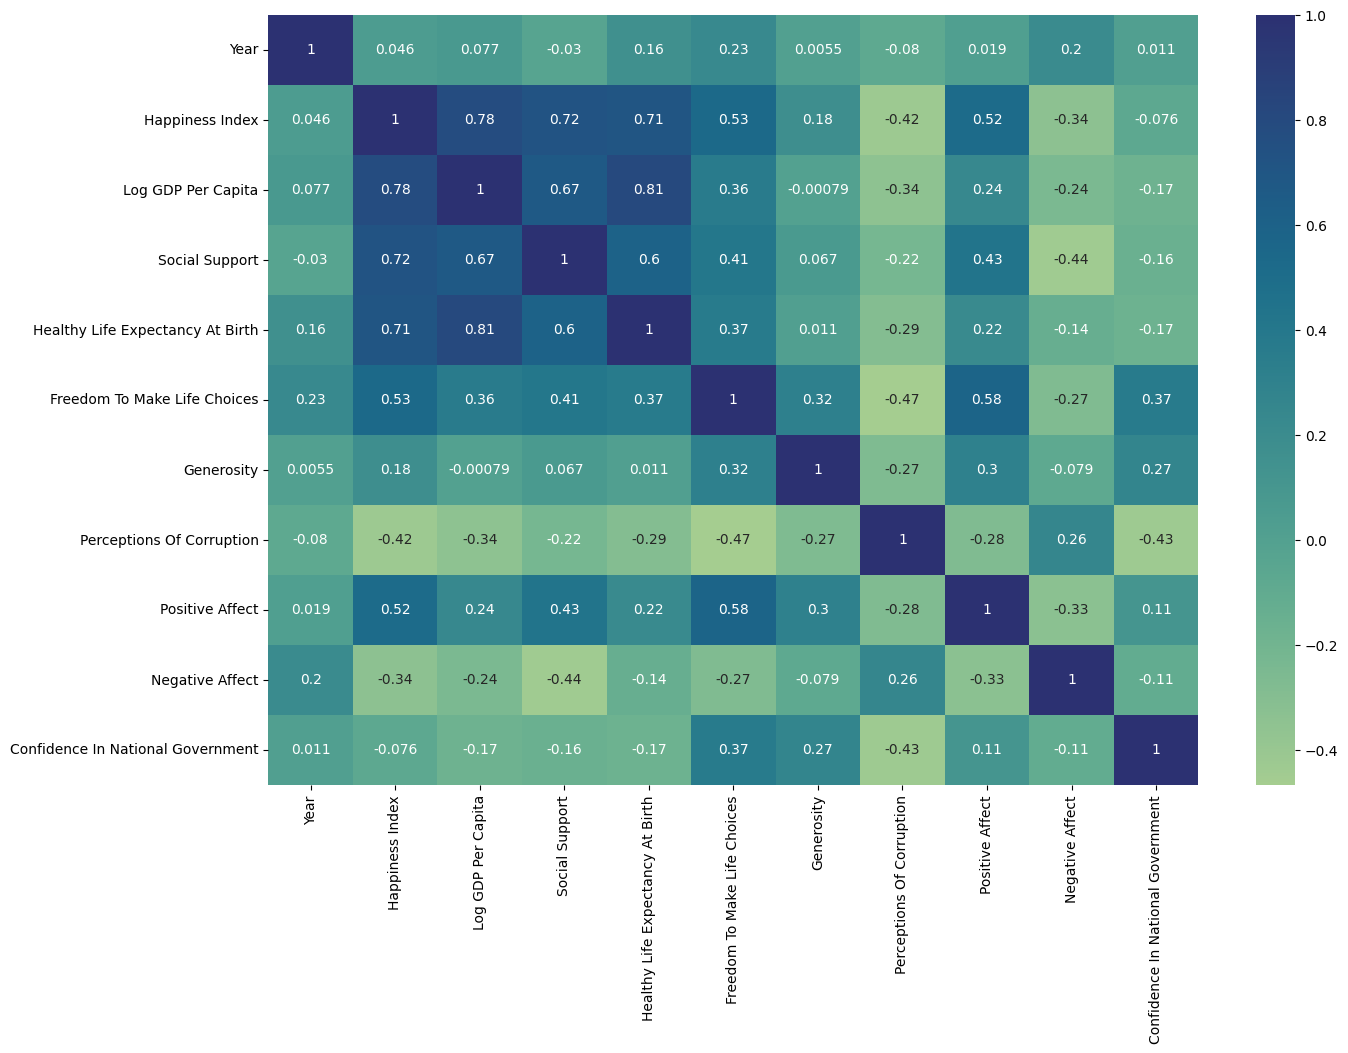

In [156]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(),annot=True,cmap='crest')
plt.show()

Insights:
- Log GDP per capita, social support, and healthy life expectancy at birth have the highest correlation coefficient with happiness index.
- Surprisingly, factors such as perceptions of corruption and confidence in national government don't really affect the happiness index of a country.

<h2 align="center">Top 10 Greatest Changes in Countries' Happiness (Upward and Downward)

In [157]:
earliest_year = df.groupby('Country Name')['Year'].min()
latest_year = df.groupby('Country Name')['Year'].max()

# create a dataframe with earliest and latest happiness index for each country
earliest_happiness = df[df.set_index(['Country Name', 'Year']).index.isin(earliest_year.items())][['Country Name', 'Happiness Index']]
latest_happiness = df[df.set_index(['Country Name', 'Year']).index.isin(latest_year.items())][['Country Name', 'Happiness Index']]

# merge
result = pd.merge(earliest_happiness, latest_happiness, on='Country Name', suffixes=('_earliest', '_latest'))

# calculate change in happiness index
result['Change'] = result['Happiness Index_latest'] - result['Happiness Index_earliest']

# separate into upward and downward changes then concatenate
upward_changes = result[result['Change'] > 0].nlargest(10, 'Change')
downward_changes = result[result['Change'] < 0].nsmallest(10, 'Change').iloc[::-1]
top_10_changes = pd.concat([upward_changes, downward_changes])


fig = px.bar(top_10_changes, x='Country Name', y='Change',
             color='Change',
             color_continuous_scale='RdYlGn',
             labels={'Change': 'Happiness Index Change'},
             title='Top 10 Greatest Changes in Countries\' Happiness (Upward and Downward)',
             template='seaborn')
fig.add_shape(type='line', x0=-0.5, x1=19.5, y0=0, y1=0, line=dict(color='white', dash='dash'))
fig.show()

<h2 align="center">Data Splitting

In [158]:
# DATA SPLITTING

df.sort_values(by="Year", inplace=True)
df_train = df.loc[(df["Year"] >= 2005) & (df["Year"] <= 2021)].dropna()
df_test = df.loc[(df["Year"] == 2022)]

X = df_train[['Log GDP Per Capita', 'Social Support', 'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices', 'Positive Affect']]
y = df_train['Happiness Index']
X_test_2022 = df_test[['Log GDP Per Capita', 'Social Support', 'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices', 'Positive Affect']]
y_test_2022 = df_test.loc[X_test_2022.index, 'Happiness Index']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, shuffle=False)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_test_2022 = scaler.transform(X_test_2022)

<h2 align="center"> Model Tuning and Training

In [159]:
# GRADIENT BOOSTING REGRESSION (GBR)

GBR_model = GradientBoostingRegressor(learning_rate=0.2, max_depth=9, max_features='sqrt', min_samples_leaf=1, min_samples_split=4, n_estimators=19)

'''
param_grid = { # tuning
    
    # RUN -->>>
    # 'learning_rate': [0.18, 0.19, 0.2, 0.25, 0.3],
    # 'n_estimators': [15, 16, 17, 18, 19],
    # 'max_depth': [5, 6, 7, 8, 9],
    # 'min_samples_split': [4, 5, 6, 7, 8],
    # 'min_samples_leaf': [1, 2, 3],
    # 'max_features': ['sqrt', 'log2']

    # RUN RESULTS
    # Best Parameters: {'learning_rate': 0.2, 'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 19}
    # GBR Mean Squared Error: 0.2376024030230025
    # GBR R-squared: 0.798534272505915
    # GBR Mean Squared Error (2022): 0.35279351696890143
    # GBR R-squared (2022): 0.7776901143538473
}

# cross-validation using GS
GBR_GS = GridSearchCV(estimator=GBR_GS, param_grid=param_grid, scoring='neg_mean_squared_error', cv=7, n_jobs=5, verbose=1)

GBR_GS.fit(X_train, y_train) # training

# best model
best_params = GBR_GS.best_params_
print(f'Best Parameters: {best_params}')

GBR_pred = GBR_GS.best_estimator_.predict(X_test) # prediction
GBR_pred_2022 = GBR_GS.best_estimator_.predict(X_test_2022) # prediction for 2022
'''
GBR_model.fit(X_train, y_train)
 
GBR_pred = GBR_model.predict(X_test)
GBR_pred_2022 = GBR_model.predict(X_test_2022)

'''
# eval metrics
GBR_mse = mean_squared_error(y_test, GBR_pred)
GBR_r2 = r2_score(y_test, GBR_pred)
GBR_mse_2022 = mean_squared_error(y_test_2022, GBR_pred_2022)
GBR_r2_2022 = r2_score(y_test_2022, GBR_pred_2022)

print(f'GBR Mean Squared Error: {GBR_mse}')
print(f'GBR R-squared: {GBR_r2}')
print(f'GBR Mean Squared Error (2022): {GBR_mse_2022}')
print(f'GBR R-squared (2022): {GBR_r2_2022}')
'''

"\n# eval metrics\nGBR_mse = mean_squared_error(y_test, GBR_pred)\nGBR_r2 = r2_score(y_test, GBR_pred)\nGBR_mse_2022 = mean_squared_error(y_test_2022, GBR_pred_2022)\nGBR_r2_2022 = r2_score(y_test_2022, GBR_pred_2022)\n\nprint(f'GBR Mean Squared Error: {GBR_mse}')\nprint(f'GBR R-squared: {GBR_r2}')\nprint(f'GBR Mean Squared Error (2022): {GBR_mse_2022}')\nprint(f'GBR R-squared (2022): {GBR_r2_2022}')\n"

In [160]:
# SUPPORT VECTOR REGRESSOR (SVR)


SVR_model = SVR(C=3, gamma='scale', kernel='rbf')

'''
param_grid = { # TUNING
    
    # <<<-- RUN -->>>
    # 'kernel': ['linear', 'rbf', 'poly'],
    # 'C': [2, 3, 4, 5, 6, 7, 8],
    # 'gamma': ['scale']

    # RUN RESULTS
#     Best Parameters: {'C': 3, 'gamma': 'scale', 'kernel': 'rbf'}
#     SVR Mean Squared Error: 0.2574491545567846
#     SVR R-squared: 0.7817059905303297
#     SVR Mean Squared Error (2022): 0.349341474683391
#     SVR R-squared (2022): 0.7798653899437475
}

SVR_GS = GridSearchCV(estimator=SVR_GS, param_grid=param_grid, scoring='neg_mean_squared_error', cv=7, n_jobs=5, verbose=1)

SVR_GS.fit(X_train, y_train) # training

# best model
SVM_best_params = SVR_GS.best_params_
print(f'Best Parameters: {SVM_best_params}')

SVR_pred = SVR_GS.best_estimator_.predict(X_test) # prediction
SVR_pred_2022 = SVR_GS.best_estimator_.predict(X_test_2022) # prediction for 2022
'''

SVR_model.fit(X_train, y_train)
 
SVR_pred = SVR_model.predict(X_test)
SVR_pred_2022 = SVR_model.predict(X_test_2022)


'''
# eval metrics
SVR_mse = mean_squared_error(y_test, SVR_pred)
SVR_r2 = r2_score(y_test, SVR_pred)
SVR_mse_2022 = mean_squared_error(y_test_2022, SVR_pred_2022)
SVR_r2_2022 = r2_score(y_test_2022, SVR_pred_2022)

print(f'SVR Mean Squared Error: {SVR_mse}')
print(f'SVR R-squared: {SVR_r2}')
print(f'SVR Mean Squared Error (2022): {SVR_mse_2022}')
print(f'SVR R-squared (2022): {SVR_r2_2022}')
'''

"\n# eval metrics\nSVR_mse = mean_squared_error(y_test, SVR_pred)\nSVR_r2 = r2_score(y_test, SVR_pred)\nSVR_mse_2022 = mean_squared_error(y_test_2022, SVR_pred_2022)\nSVR_r2_2022 = r2_score(y_test_2022, SVR_pred_2022)\n\nprint(f'SVR Mean Squared Error: {SVR_mse}')\nprint(f'SVR R-squared: {SVR_r2}')\nprint(f'SVR Mean Squared Error (2022): {SVR_mse_2022}')\nprint(f'SVR R-squared (2022): {SVR_r2_2022}')\n"

In [161]:
# DECISION TREE REGRESSOR (DTR)


DTR_model = DecisionTreeRegressor(max_depth=7, max_features=None, min_samples_leaf=9, min_samples_split=5)

'''
param_grid={ # TUNING
    
    # <<<-- RUN -->>
    # 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
    # 'max_features': [None, 'sqrt', 'log2'],
    # 'min_samples_split': [2, 3, 4, 5, 6, 7],
    # 'min_samples_leaf': [5, 6, 7, 8, 9, 10]

    #RUN RESULTS
    # Best Parameters: {'max_depth': 7, 'max_features': None, 'min_samples_leaf': 9, 'min_samples_split': 5}
    # DTR Mean Squared Error: 0.326258649830827
    # DTR R-squared: 0.7233616520576935
    # DTR Mean Squared Error (2022): 0.4570410461895424
    # DTR R-squared (2022): 0.7119994052414756
}

DTR_GS = GridSearchCV(estimator=DTR_GS, param_grid=param_grid, scoring='neg_mean_squared_error', cv=7, n_jobs=5, verbose=1)

DTR_GS.fit(X_train, y_train) # training

# best model
DTR_best_params = DTR_GS.best_params_
print(f'Best Parameters: {DTR_best_params}')

DTR_pred = DTR_GS.best_estimator_.predict(X_test) # prediction
DTR_pred_2022 = DTR_GS.best_estimator_.predict(X_test_2022) # prediction for 2022
'''

DTR_model.fit(X_train, y_train)
 
DTR_pred = DTR_model.predict(X_test)
DTR_pred_2022 = DTR_model.predict(X_test_2022)


'''
# eval metrics
DTR_mse = mean_squared_error(y_test, DTR_pred)
DTR_r2 = r2_score(y_test, DTR_pred)
DTR_mse_2022 = mean_squared_error(y_test_2022, DTR_pred_2022)
DTR_r2_2022 = r2_score(y_test_2022, DTR_pred_2022)

print(f'DTR Mean Squared Error: {DTR_mse}')
print(f'DTR R-squared: {DTR_r2}')
print(f'DTR Mean Squared Error (2022): {DTR_mse_2022}')
print(f'DTR R-squared (2022): {DTR_r2_2022}')
'''


"\n# eval metrics\nDTR_mse = mean_squared_error(y_test, DTR_pred)\nDTR_r2 = r2_score(y_test, DTR_pred)\nDTR_mse_2022 = mean_squared_error(y_test_2022, DTR_pred_2022)\nDTR_r2_2022 = r2_score(y_test_2022, DTR_pred_2022)\n\nprint(f'DTR Mean Squared Error: {DTR_mse}')\nprint(f'DTR R-squared: {DTR_r2}')\nprint(f'DTR Mean Squared Error (2022): {DTR_mse_2022}')\nprint(f'DTR R-squared (2022): {DTR_r2_2022}')\n"

In [162]:
# RANDOM FOREST REGRESSOR (RFR)


RFR_model = RandomForestRegressor(max_depth=18, max_features='sqrt', min_samples_leaf=1, min_samples_split=4, n_estimators=17)

'''
param_grid={ # TUNING
    # RUN
    'n_estimators': [16, 17, 18, 19, 20],
    'max_depth': [15, 16, 17, 18, 19],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [4, 5, 6, 7],
    'min_samples_leaf': [1, 2, 3]

    # RUN RESULTS
    # Best Parameters: {'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 4, 'n_estimators': 17}
    # RFR Mean Squared Error: 0.234508391571115
    # RFR R-squared: 0.8011577193233667
    # RFR Mean Squared Error (2022): 0.34584595202102375
    # RFR R-squared (2022): 0.7820680643296629
}

RFR_GS = GridSearchCV(estimator=RFR_GS, param_grid=param_grid, scoring='neg_mean_squared_error', cv=7, n_jobs=5, verbose=1)

RFR_GS.fit(X_train, y_train) # training

# best model
RFR_best_params = RFR_GS.best_params_
print(f'Best Parameters: {RFR_best_params}')

RFR_pred = RFR_GS.best_estimator_.predict(X_test) # prediction
RFR_pred_2022 = RFR_GS.best_estimator_.predict(X_test_2022) # prediction for 2022
'''

RFR_model.fit(X_train, y_train)
 
RFR_pred = RFR_model.predict(X_test)
RFR_pred_2022 = RFR_model.predict(X_test_2022)


'''
# eval metrics
RFR_mse = mean_squared_error(y_test, RFR_pred)
RFR_r2 = r2_score(y_test, RFR_pred)
RFR_mse_2022 = mean_squared_error(y_test_2022, RFR_pred_2022)
RFR_r2_2022 = r2_score(y_test_2022, RFR_pred_2022)

print(f'RFR Mean Squared Error: {RFR_mse}')
print(f'RFR R-squared: {RFR_r2}')
print(f'RFR Mean Squared Error (2022): {RFR_mse_2022}')
print(f'RFR R-squared (2022): {RFR_r2_2022}')
'''

"\n# eval metrics\nRFR_mse = mean_squared_error(y_test, RFR_pred)\nRFR_r2 = r2_score(y_test, RFR_pred)\nRFR_mse_2022 = mean_squared_error(y_test_2022, RFR_pred_2022)\nRFR_r2_2022 = r2_score(y_test_2022, RFR_pred_2022)\n\nprint(f'RFR Mean Squared Error: {RFR_mse}')\nprint(f'RFR R-squared: {RFR_r2}')\nprint(f'RFR Mean Squared Error (2022): {RFR_mse_2022}')\nprint(f'RFR R-squared (2022): {RFR_r2_2022}')\n"

In [163]:
# K-NEAREST NEIGHBORS REGRESSOR (KNNR)

KNN_model = KNeighborsRegressor(n_neighbors=8, p=1, weights='distance')

'''
param_grid={ # TUNING
    
    # <<<-- RUN -->>>
    # 'n_neighbors': [6, 7, 8, 9, 10],
    # 'weights': ['uniform', 'distance'],
    # 'p': [1, 2]

    # RUN RESULTS
    # Best Parameters: {'n_neighbors': 8, 'p': 1, 'weights': 'distance'}
    # KNN Mean Squared Error: 0.2415836247027869
    # KNN R-squared: 0.7951585502412065
    # KNN Mean Squared Error (2022): 0.3341529161564767
    # KNN R-squared (2022): 0.7894363331352741
}

KNN_GS = GridSearchCV(estimator=KNN_GS, param_grid=param_grid, scoring='neg_mean_squared_error', cv=7, n_jobs=5, verbose=1)

KNN_GS.fit(X_train, y_train) # training

# best model
KNN_best_params = KNN_GS.best_params_
print(f'Best Parameters: {KNN_best_params}')

KNN_pred = KNN_GS.best_estimator_.predict(X_test) # prediction
KNN_pred_2022 = KNN_GS.best_estimator_.predict(X_test_2022) # prediction for 2022
'''

KNN_model.fit(X_train, y_train)
 
KNN_pred = KNN_model.predict(X_test)
KNN_pred_2022 = KNN_model.predict(X_test_2022)


'''
# eval metrics
KNN_mse = mean_squared_error(y_test, KNN_pred)
KNN_r2 = r2_score(y_test, KNN_pred)
KNN_mse_2022 = mean_squared_error(y_test_2022, KNN_pred_2022)
KNN_r2_2022 = r2_score(y_test_2022, KNN_pred_2022)

print(f'KNN Mean Squared Error: {KNN_mse}')
print(f'KNN R-squared: {KNN_r2}')
print(f'KNN Mean Squared Error (2022): {KNN_mse_2022}')
print(f'KNN R-squared (2022): {KNN_r2_2022}')
'''


"\n# eval metrics\nKNN_mse = mean_squared_error(y_test, KNN_pred)\nKNN_r2 = r2_score(y_test, KNN_pred)\nKNN_mse_2022 = mean_squared_error(y_test_2022, KNN_pred_2022)\nKNN_r2_2022 = r2_score(y_test_2022, KNN_pred_2022)\n\nprint(f'KNN Mean Squared Error: {KNN_mse}')\nprint(f'KNN R-squared: {KNN_r2}')\nprint(f'KNN Mean Squared Error (2022): {KNN_mse_2022}')\nprint(f'KNN R-squared (2022): {KNN_r2_2022}')\n"

<h2 align="center">Results Visualization

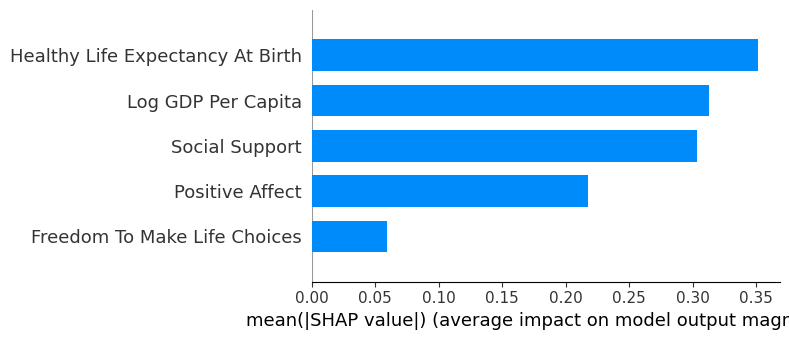

In [164]:
explainer = shap.Explainer(GBR_model)
shap_values = explainer(X_test_2022)

shap.summary_plot(shap_values, X_test_2022, plot_type="bar", feature_names=['Log GDP Per Capita', 'Social Support', 'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices', 'Positive Affect'])

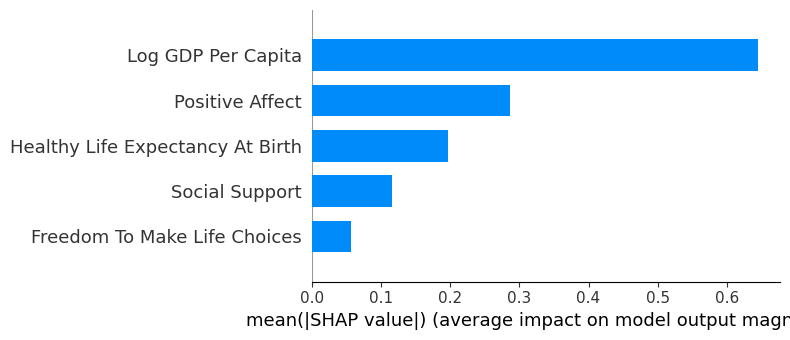

In [165]:
explainer = shap.Explainer(DTR_model)
shap_values = explainer(X_test_2022)

shap.summary_plot(shap_values, X_test_2022, plot_type="bar", feature_names=['Log GDP Per Capita', 'Social Support', 'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices', 'Positive Affect'])

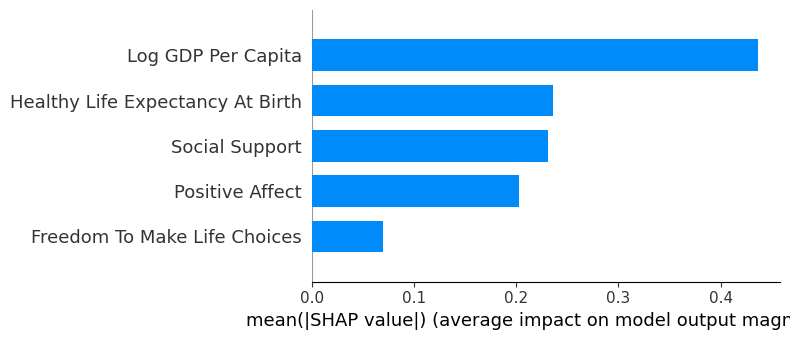

In [166]:
explainer = shap.Explainer(RFR_model)
shap_values = explainer(X_test_2022)

shap.summary_plot(shap_values, X_test_2022, plot_type="bar", feature_names=['Log GDP Per Capita', 'Social Support', 'Healthy Life Expectancy At Birth', 'Freedom To Make Life Choices', 'Positive Affect'])

In [167]:
df_line_plot = pd.DataFrame({
    'Country': df_test.loc[y_test_2022.index, "Country Name"],
    'Actual Happiness Index': y_test_2022,
    'GBR': GBR_pred_2022,
    'SVR': SVR_pred_2022,
    'DTR': DTR_pred_2022,
    'RFR': RFR_pred_2022,
    'KNN': KNN_pred_2022,
})

fig = px.line(df_line_plot, x='Country', y=['Actual Happiness Index', 'GBR', 'SVR', 'DTR', 'RFR', 'KNN'],
              title='Actual vs Predicted Happiness Index for 2022',
              labels={'value': 'Happiness Index', 'Country': 'Country'},
              line_shape='linear',
              template='seaborn')

fig.update_layout(xaxis=dict(tickangle=45),
                  legend=dict(x=0.27, y=0),
                  height=600,
                  width=1200)

fig.show()


<h2 align="center">Evaluation Metrics

In [168]:
# MSE
GBR_mse = mean_squared_error(y_test, GBR_pred)
GBR_mse_2022 = mean_squared_error(y_test_2022, GBR_pred_2022)
SVR_mse = mean_squared_error(y_test, SVR_pred)
SVR_mse_2022 = mean_squared_error(y_test_2022, SVR_pred_2022)
DTR_mse = mean_squared_error(y_test, DTR_pred)
DTR_mse_2022 = mean_squared_error(y_test_2022, DTR_pred_2022)
RFR_mse = mean_squared_error(y_test, RFR_pred)
RFR_mse_2022 = mean_squared_error(y_test_2022, RFR_pred_2022)
KNN_mse = mean_squared_error(y_test, KNN_pred)
KNN_mse_2022 = mean_squared_error(y_test_2022, KNN_pred_2022)

# R2
GBR_r2 = r2_score(y_test, GBR_pred)
GBR_r2_2022 = r2_score(y_test_2022, GBR_pred_2022)
SVR_r2 = r2_score(y_test, SVR_pred)
SVR_r2_2022 = r2_score(y_test_2022, SVR_pred_2022)
DTR_r2 = r2_score(y_test, DTR_pred)
DTR_r2_2022 = r2_score(y_test_2022, DTR_pred_2022)
RFR_r2 = r2_score(y_test, RFR_pred)
RFR_r2_2022 = r2_score(y_test_2022, RFR_pred_2022)
KNN_r2 = r2_score(y_test, KNN_pred)
KNN_r2_2022 = r2_score(y_test_2022, KNN_pred_2022)

# EVS
GBR_evs = explained_variance_score(y_test, GBR_pred)
GBR_evs_2022 = explained_variance_score(y_test_2022, GBR_pred_2022)
SVR_evs = explained_variance_score(y_test, SVR_pred)
SVR_evs_2022 = explained_variance_score(y_test_2022, SVR_pred_2022)
DTR_evs = explained_variance_score(y_test, DTR_pred)
DTR_evs_2022 = explained_variance_score(y_test_2022, DTR_pred_2022)
RFR_evs = explained_variance_score(y_test, RFR_pred)
RFR_evs_2022 = explained_variance_score(y_test_2022, RFR_pred_2022)
KNN_evs = explained_variance_score(y_test, KNN_pred)
KNN_evs_2022 = explained_variance_score(y_test_2022, KNN_pred_2022)

# MAPE
GBR_mape = mean_absolute_percentage_error(y_test, GBR_pred)
GBR_mape_2022 = mean_absolute_percentage_error(y_test_2022, GBR_pred_2022)
SVR_mape = mean_absolute_percentage_error(y_test, SVR_pred)
SVR_mape_2022 = mean_absolute_percentage_error(y_test_2022, SVR_pred_2022)
DTR_mape = mean_absolute_percentage_error(y_test, DTR_pred)
DTR_mape_2022 = mean_absolute_percentage_error(y_test_2022, DTR_pred_2022)
RFR_mape = mean_absolute_percentage_error(y_test, RFR_pred)
RFR_mape_2022 = mean_absolute_percentage_error(y_test_2022, RFR_pred_2022)
KNN_mape = mean_absolute_percentage_error(y_test, KNN_pred)
KNN_mape_2022 = mean_absolute_percentage_error(y_test_2022, KNN_pred_2022)


print('         <<<-- MEAN SQUARED ERROR -->>>')
print(f'GBR: {GBR_mse:.5f}              GBR (2022 only): {GBR_mse_2022:.5f}')
print(f'SVR: {SVR_mse:.5f}              SVR (2022 only): {SVR_mse_2022:.5f}')
print(f'DTR: {DTR_mse:.5f}              DTR (2022 only): {DTR_mse_2022:.5f}')
print(f'RFR: {RFR_mse:.5f}              RFR (2022 only): {RFR_mse_2022:.5f}')
print(f'KNN: {KNN_mse:.5f}              KNN (2022 only): {KNN_mse_2022:.5f}')
print('==================================================')
print('              <<<-- R2 SCORE -->>>')
print(f'GBR: {GBR_r2:.5f}              GBR (2022 only): {GBR_r2_2022:.5f}')
print(f'SVR: {SVR_r2:.5f}              SVR (2022 only): {SVR_r2_2022:.5f}')
print(f'DTR: {DTR_r2:.5f}              DTR (2022 only): {DTR_r2_2022:.5f}')
print(f'RFR: {RFR_r2:.5f}              RFR (2022 only): {RFR_r2_2022:.5f}')
print(f'KNN: {KNN_r2:.5f}              KNN (2022 only): {KNN_r2_2022:.5f}')
print('==================================================')
print('      <<<-- EXPLAINED VARIANCE SCORE -->>>')
print(f'GBR: {GBR_evs:.5f}              GBR (2022 only): {GBR_evs_2022:.5f}')
print(f'SVR: {SVR_evs:.5f}              SVR (2022 only): {SVR_evs_2022:.5f}')
print(f'DTR: {DTR_evs:.5f}              DTR (2022 only): {DTR_evs_2022:.5f}')
print(f'RFR: {RFR_evs:.5f}              RFR (2022 only): {RFR_evs_2022:.5f}')
print(f'KNN: {KNN_evs:.5f}              KNN (2022 only): {KNN_evs_2022:.5f}')
print('==================================================')
print('   <<<-- MEAN ABSOLUTE PERCENTAGE ERROR -->>>')
print(f'GBR: {GBR_mape:.3f}%              GBR (2022 only): {GBR_mape_2022:.3f}%')
print(f'SVR: {SVR_mape:.3f}%              SVR (2022 only): {SVR_mape_2022:.3f}%')
print(f'DTR: {DTR_mape:.3f}%              DTR (2022 only): {DTR_mape_2022:.3f}%')
print(f'RFR: {RFR_mape:.3f}%              RFR (2022 only): {RFR_mape_2022:.3f}%')
print(f'KNN: {KNN_mape:.3f}%              KNN (2022 only): {KNN_mape_2022:.3f}%')

         <<<-- MEAN SQUARED ERROR -->>>
GBR: 0.24677              GBR (2022 only): 0.33737
SVR: 0.25745              SVR (2022 only): 0.34934
DTR: 0.32626              DTR (2022 only): 0.45704
RFR: 0.24058              RFR (2022 only): 0.33058
KNN: 0.24158              KNN (2022 only): 0.33415
              <<<-- R2 SCORE -->>>
GBR: 0.79076              GBR (2022 only): 0.78741
SVR: 0.78171              SVR (2022 only): 0.77987
DTR: 0.72336              DTR (2022 only): 0.71200
RFR: 0.79601              RFR (2022 only): 0.79169
KNN: 0.79516              KNN (2022 only): 0.78944
      <<<-- EXPLAINED VARIANCE SCORE -->>>
GBR: 0.79172              GBR (2022 only): 0.78896
SVR: 0.78258              SVR (2022 only): 0.77998
DTR: 0.72592              DTR (2022 only): 0.71205
RFR: 0.79705              RFR (2022 only): 0.79183
KNN: 0.79627              KNN (2022 only): 0.79091
   <<<-- MEAN ABSOLUTE PERCENTAGE ERROR -->>>
GBR: 0.076%              GBR (2022 only): 0.104%
SVR: 0.078%           